<a href="https://colab.research.google.com/github/jihyeon602/practices_visualization/blob/main/practice_pyplot(%EC%8B%9C%EA%B3%84%EC%97%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 아래 실습을 위한 파일은 eTL에서 다운받을 수 있습니다.  

  * `covid19_seoul.csv` 서울 열린데이터 광장에서 다운로드 받은 파일로, 서울시 기준의 코로나19 확진자 관련 정보를 확인할 수 있습니다.  

  * `environment1.csv`와 `environment2.csv`는 공공 데이터 포털(data.go.kr)에서 다운로드 받은 파일를 분할한 것으로, 도로 재비산먼지 측정 정보를 확인할 수 있습니다.  
    * 설명) 한국환경공단_도로 재비산먼지 측정 정보는 특수제작한 이동측정차량으로 주행하는 차량의 타이어(휠)와 도로면의 마찰에 의해서 재비산되는 먼지(PM10)를 측정한 월간 평균 자료입니다.  
    * 주의) 데이터의 결측치는 실습을 위해서 임의로 비워둔 값입니다.


**수업에 필요한 모듈을 임포트하여라.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

실습에 앞서, `matplotlib` 패키지의 글꼴을 한글 표시가 가능하도록 한글을 지원하는 글꼴로 바꿔준다. 혹시 한글 표시에 오류가 발생한다면 상단 메뉴에서 [런타임]>[런타임 다시 시작] 또는 [다시 시작 및 모두 실행] 을 눌러 런타임을 재시작하면 된다.  

In [2]:
!apt install -y fonts-nanum
!fc-cache -fv

applyfont = "NanumBarunGothic"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (38.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

한글이 잘 표시되는지 아래 코드를 실행시켜서 확인해보면 좋다. 한글이 정상적으로 나온다면 잘 적용된 것이다.

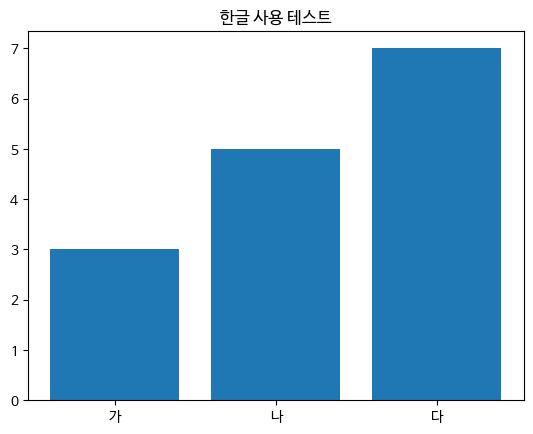

In [3]:
dat = pd.Series({'가': 3, '나': 5, '다': 7})

plt.bar(dat.index, dat)
plt.title("한글 사용 테스트")
plt.show()

**문제1) 아래의 질문에 답하여라.**

1) `covid19_seoul.csv` 파일을 읽어 데이터프레임 `df_covid`를 만들어라.

In [4]:
df_covid = pd.read_csv("./seoul_covid19.csv")
df_covid

<ipython-input-4-8cf355221d41>:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv("./seoul_covid19.csv")


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


2) `df_covid`의 열(column)에는 어떠한 것이 있는가? 열의 개수는 몇 개인가?

In [5]:
df_covid.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [6]:
len(df_covid.columns)

14

연번, 확진일 등의 정보를 담은 열(column)이 존재하고, 총 개수는 14개이다.

참고: 사람에게 보기 좋게 정보를 출력해주는 `info()`라는 메소드를 제공하고 있다. 해당 메소드를 이용하면 전체적인 정보를 빠르게 확인할 수 있다.

In [7]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182558 entries, 0 to 182557
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연번      182558 non-null  int64  
 1   확진일     182558 non-null  object 
 2   환자번호    42279 non-null   float64
 3   국적      0 non-null       float64
 4   환자정보    42279 non-null   object 
 5   지역      182558 non-null  object 
 6   여행력     2072 non-null    object 
 7   접촉력     182558 non-null  object 
 8   조치사항    0 non-null       float64
 9   상태      182558 non-null  object 
 10  이동경로    50000 non-null   object 
 11  등록일     182558 non-null  object 
 12  수정일     182558 non-null  object 
 13  노출여부    182558 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 19.5+ MB


3) `df_covid`에는 몇 개의 관측치가 있는가?

데이터프레임에서 관측치의 개수, 즉, 행의 개수는 `len()`  함수를 통해 구할 수 있다.

In [8]:
len(df_covid)

182558

4) 가장 많은 확진자가 나온 날은 언제인가? 그때의 확진자 수는 몇 명인가?

먼저, 각 날짜별 확진자수를 구하기 위하여 `value_counts()` 메소드를 사용한다.


In [9]:
covid_per_day = df_covid["확진일"].value_counts()
covid_per_day

,count
확진일,
2021-12-07,2901
2021-12-10,2835
2021-12-09,2800
2021-12-08,2790
2021-12-11,2528
...,...
2020-04-30,1
2020-04-15,1
2020-04-18,1


방법 1: 내림차순 정렬 후 `head()` 메소드를 통해 가장 상위에 나타난 행을 확인

In [10]:
covid_per_day.sort_values(ascending=False).head()

,count
확진일,
2021-12-07,2901
2021-12-10,2835
2021-12-09,2800
2021-12-08,2790
2021-12-11,2528


방법 2: `max()` 메소드를 이용한 후 해당 행을 찾는 방법

In [11]:
covid_per_day[covid_per_day == covid_per_day.max()]

,count
확진일,
2021-12-07,2901


5) 일별 확진자수를 선 그래프로 시각화하여라.

시간 순으로 보기 위해서 시리즈의 인덱스인 날짜로 정렬한다. 이를 위해 `sort_index()` 메소드를 이용한다.

In [12]:
covid_per_day = covid_per_day.sort_index()
covid_per_day

,count
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2021-12-07,2901
2021-12-08,2790
2021-12-09,2800


`matplotlib.pyplot` 모듈에서 `plt()` 함수를 이용하면 꺾은선 그래프를 그릴 수 있다.

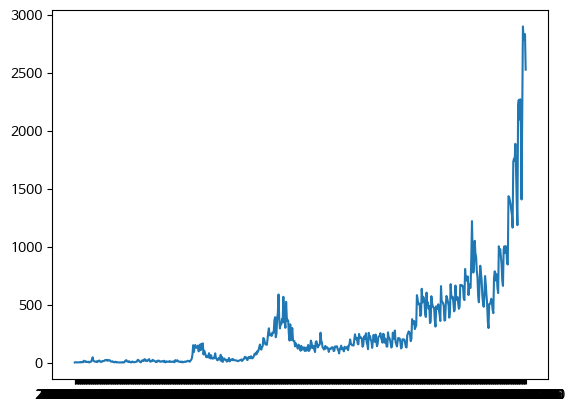

In [13]:
plt.plot(covid_per_day)
plt.show()

참고: 아래와 같이 여러 정보를 같이 넣어주면 시각적으로 좋다.

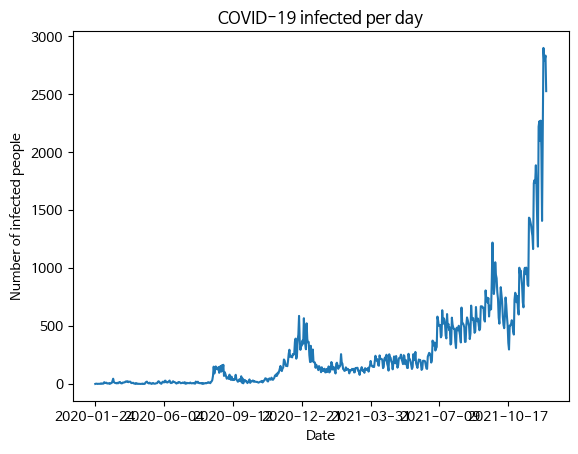

In [14]:
plt.plot(covid_per_day)

plt.title("COVID-19 infected per day")
plt.xlabel("Date")
plt.ylabel("Number of infected people")
plt.xticks(covid_per_day.index[::100])

plt.show()

6) 지역별 확진자 수를 막대 그래프로 시각화하여라. 단, 관악구는 다른 색으로 표시하여, 잘 보이도록 한다.

먼저, 지역별 확진자수를 구한다.

In [15]:
covid_per_area = df_covid["지역"].value_counts()
covid_per_area

,count
지역,
송파구,10905
강남구,10358
관악구,9296
타시도,9057
구로구,8932
영등포구,8775
강서구,8376
은평구,7721
노원구,7535


그 후, `plt.bar()` 메소드를 이용해 막대그래프를 그려준다.

<BarContainer object of 35 artists>

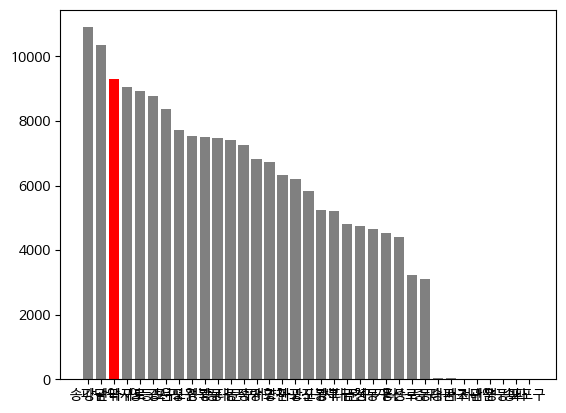

In [16]:
colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

plt.bar(covid_per_area.index, covid_per_area, color=colors)

아래와 같이 정보를 더 표시하고 사이즈를 키우면 시각적으로 좋다.

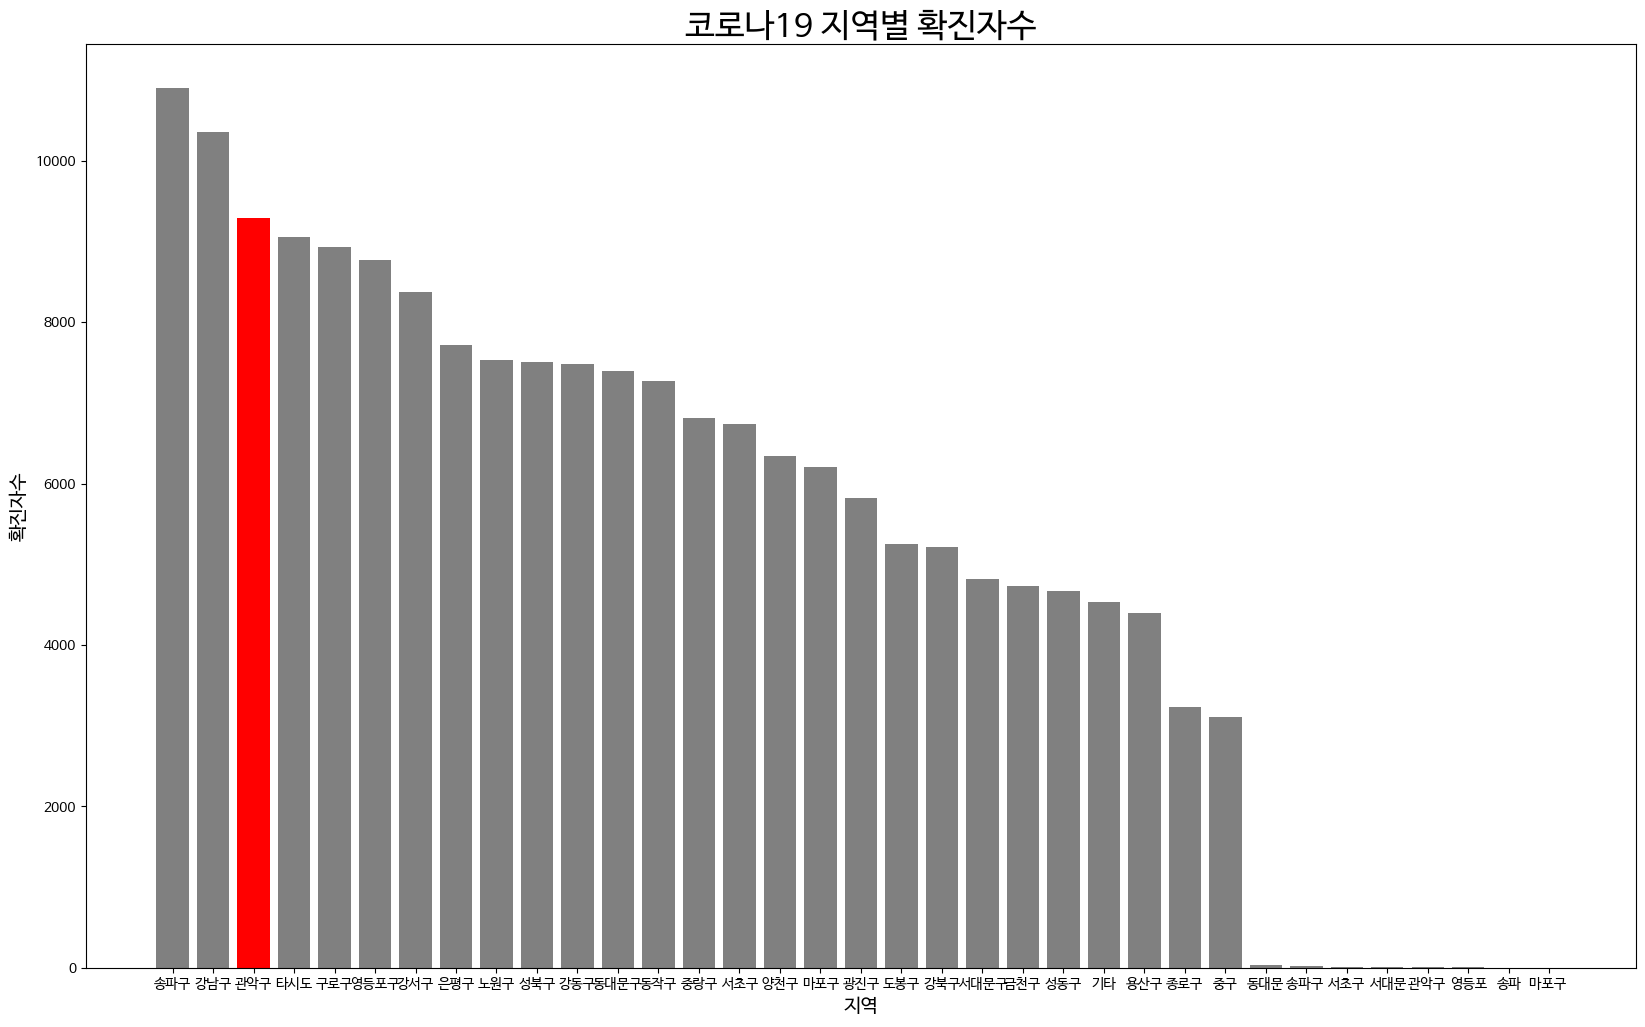

In [17]:
fig = plt.figure(figsize=(20, 12)) #figsize로 그래프의 크기 변경 가능

colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

plt.bar(covid_per_area.index, covid_per_area, color=colors)

plt.title("코로나19 지역별 확진자수", fontsize=24)
plt.xlabel("지역", fontsize=14)
plt.ylabel("확진자수", fontsize=14)

plt.show()

**문제2) 아래의 질문에 답하여라.**

1) `environment1.csv`와 `environment2.csv` 파일을 읽어 데이터프레임 `df1`과 `df2`를 만들어라.

*데이터 변경함(2025.02.01 - 2025.02.28)

In [33]:
df1 = pd.read_excel("./정보공개_20250317 (1).xlsx")
df1

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NO,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
0,1,2025-02-11,11:38,서울,도봉구,도봉로,서울특별시 도봉구 도봉동 368-2 도,서울특별시 도봉구 창동 737-1 천,5.71,1,56,11,매우좋음
1,2,2025-02-11,11:58,서울,도봉구,노해로,서울특별시 도봉구 쌍문동 358-7도,서울특별시 도봉구 창동 21-1천,2.70,1,57,3,매우좋음
2,3,2025-02-11,12:06,서울,도봉구,노해로,서울특별시 도봉구 창동 21-1천,서울특별시 도봉구 쌍문동 358-7도,2.75,2,56,16,매우좋음
3,4,2025-02-11,12:24,서울,도봉구,삼양로,쌍문동 513-2대,쌍문동 424-31천,0.69,2,56,17,매우좋음
4,5,2025-02-11,12:31,서울,도봉구,해등로,서울특별시 도봉구 쌍문동 509-11도,서울특별시 도봉구 창동 산135-1도,3.85,2,55,10,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,371,2025-02-03,13:49,경기,파주시,경의로,경기도 파주시 아동동 299-16 도,경기도 고양시일산서구 덕이동 319-5도,2.48,-2,39,61,좋음
371,372,2025-02-03,14:01,경기,파주시,와석순환로,경기도 파주시 와동동 1421도,경기도 파주시 야당동 998도,0.92,-2,39,94,좋음
372,373,2025-02-03,14:05,경기,파주시,미래로,경기도 파주시 당하동 650-1 도,경기도 파주시 동패동 22-3 도,1.17,-2,39,170,나쁨
373,374,2025-02-03,14:16,경기,파주시,심학산로,경기도 파주시 와동동 1421도,경기도 파주시 문발동 541-3 도,1.44,-3,40,90,좋음


In [29]:
df2 = pd.read_excel("./정보공개_20250317 (2).xlsx")
df2

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NO,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
0,1,2025-02-28,09:21,인천,계양구,봉오대로,인천광역시 계양구 효성동 산67-12 임,인천광역시 계양구 서운동 121-17 천,3.61,8,44,4,매우좋음
1,2,2025-02-28,09:34,인천,계양구,오조산로,인천광역시 계양구 작전동 941도,인천광역시 계양구 용종동 230도,1.34,8,45,5,매우좋음
2,3,2025-02-28,09:43,인천,계양구,용종로,인천광역시 계양구 병방동 438도,인천광역시 계양구 계산동 1108도,1.39,7,45,6,매우좋음
3,4,2025-02-28,09:53,인천,계양구,계산새로,인천광역시 계양구 계산동 1107도,인천광역시 계양구 계산동 1035천,1.46,8,44,7,매우좋음
4,5,2025-02-28,10:03,인천,계양구,계양대로,인천광역시 계양구 계산동 1014도,인천광역시 계양구 작전동 405-2도,1.99,9,43,3,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,2025-02-13,11:29,서울,양천구,목동동로,서울특별시 양천구 신정동 574-1도,서울특별시 양천구 목동 910-2제,4.42,3,43,82,좋음
776,777,2025-02-13,12:39,서울,양천구,목동중앙로,서울특별시 양천구 목동 919-1도,서울특별시 양천구 목동 136-2도,2.19,4,42,59,좋음
777,778,2025-02-13,12:53,서울,양천구,신목로,서울특별시 양천구 목동 916-1도,서울특별시 양천구 신정동 139-2제,1.27,5,40,129,보통
778,779,2025-02-13,13:08,서울,양천구,신월로,서울특별시 양천구 신정동 1094도,서울특별시 양천구 신월동 728-28 도,3.54,5,41,117,보통


2) `df1`과 `df2`의 처음 10개와 끝 10개의 행을 확인하여라.

`head()`와 `tail()` 메소드를 이용하며, 10개의 행을 표시하기 위하여 인자로 숫자 `10`을 준다.

In [34]:
df1 = df1.set_index('NO', drop=True)
df1.head(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
NO,,,,,,,,,,,,
1,2025-02-11,11:38,서울,도봉구,도봉로,서울특별시 도봉구 도봉동 368-2 도,서울특별시 도봉구 창동 737-1 천,5.71,1,56,11,매우좋음
2,2025-02-11,11:58,서울,도봉구,노해로,서울특별시 도봉구 쌍문동 358-7도,서울특별시 도봉구 창동 21-1천,2.70,1,57,3,매우좋음
3,2025-02-11,12:06,서울,도봉구,노해로,서울특별시 도봉구 창동 21-1천,서울특별시 도봉구 쌍문동 358-7도,2.75,2,56,16,매우좋음
4,2025-02-11,12:24,서울,도봉구,삼양로,쌍문동 513-2대,쌍문동 424-31천,0.69,2,56,17,매우좋음
5,2025-02-11,12:31,서울,도봉구,해등로,서울특별시 도봉구 쌍문동 509-11도,서울특별시 도봉구 창동 산135-1도,3.85,2,55,10,매우좋음
6,2025-02-11,12:46,서울,도봉구,덕릉로,서울특별시 도봉구 창동 756-164 천,서울특별시 도봉구 창동 737-8천,1.97,2,52,22,매우좋음
7,2025-02-11,13:18,서울,도봉구,방학로,서울특별시 도봉구 방학동 18-5천,서울특별시 강북구 우이동 산103-1도,2.03,4,45,24,매우좋음
8,2025-02-11,14:16,서울,도봉구,도당로,서울특별시 도봉구 쌍문동 20-7도,서울특별시 도봉구 방학동 726-65 도,1.47,4,47,15,매우좋음
9,2025-02-11,14:30,서울,도봉구,마들로,서울특별시 도봉구 창동 796 천,서울특별시 도봉구 도봉동 11-8 답,3.71,4,46,29,매우좋음


In [36]:
df1.tail(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
NO,,,,,,,,,,,,
366,2025-02-03,12:58,경기,파주시,시청로,경기도 파주시 야동동 96-8도,경기도 파주시 금촌동 962-22도,1.49,-3,37,160,나쁨
367,2025-02-03,13:06,경기,파주시,중앙로,경기도 파주시 금촌동 329-10대,경기도 파주시 조리읍 등원리 294-6도,0.67,-2,37,45,매우좋음
368,2025-02-03,13:18,경기,파주시,금릉역로,경기도 파주시 금촌동 496-12 도,경기도 파주시 상지석동 1097 도,0.82,-2,36,216,매우나쁨
369,2025-02-03,13:20,경기,파주시,가나무로,경기도 파주시 금촌동 978-1도,경기도 파주시 금릉동 211-1도,1.36,-3,36,35,매우좋음
370,2025-02-03,13:31,경기,파주시,쇠재로,경기도 파주시 금촌동 978-35도,경기도 파주시 금촌동 978-22도,1.23,-3,37,120,보통
371,2025-02-03,13:49,경기,파주시,경의로,경기도 파주시 아동동 299-16 도,경기도 고양시일산서구 덕이동 319-5도,2.48,-2,39,61,좋음
372,2025-02-03,14:01,경기,파주시,와석순환로,경기도 파주시 와동동 1421도,경기도 파주시 야당동 998도,0.92,-2,39,94,좋음
373,2025-02-03,14:05,경기,파주시,미래로,경기도 파주시 당하동 650-1 도,경기도 파주시 동패동 22-3 도,1.17,-2,39,170,나쁨
374,2025-02-03,14:16,경기,파주시,심학산로,경기도 파주시 와동동 1421도,경기도 파주시 문발동 541-3 도,1.44,-3,40,90,좋음


In [35]:
df2 = df2.set_index('NO', drop=True)
df2.head(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
NO,,,,,,,,,,,,
1,2025-02-28,09:21,인천,계양구,봉오대로,인천광역시 계양구 효성동 산67-12 임,인천광역시 계양구 서운동 121-17 천,3.61,8,44,4,매우좋음
2,2025-02-28,09:34,인천,계양구,오조산로,인천광역시 계양구 작전동 941도,인천광역시 계양구 용종동 230도,1.34,8,45,5,매우좋음
3,2025-02-28,09:43,인천,계양구,용종로,인천광역시 계양구 병방동 438도,인천광역시 계양구 계산동 1108도,1.39,7,45,6,매우좋음
4,2025-02-28,09:53,인천,계양구,계산새로,인천광역시 계양구 계산동 1107도,인천광역시 계양구 계산동 1035천,1.46,8,44,7,매우좋음
5,2025-02-28,10:03,인천,계양구,계양대로,인천광역시 계양구 계산동 1014도,인천광역시 계양구 작전동 405-2도,1.99,9,43,3,매우좋음
6,2025-02-28,10:13,인천,계양구,주부토로,인천광역시 계양구 작전동 405-2도,인천광역시 계양구 계산동 998도,2.50,9,44,6,매우좋음
7,2025-02-28,10:41,인천,계양구,동양로,인천광역시 계양구 동양동 90-3 도,인천광역시 계양구 박촌동 18-1도,1.45,9,49,14,매우좋음
8,2025-02-28,10:49,인천,계양구,장제로,인천광역시 계양구 오류동 산79임,인천광역시 계양구 작전동 742-2 도,3.42,10,53,4,매우좋음
9,2025-02-28,11:07,인천,계양구,아나지로,인천광역시 계양구 서운동 155-3도,인천광역시 계양구 효성동 617-4대,3.63,9,65,5,매우좋음


In [37]:
df2.tail(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
NO,,,,,,,,,,,,
771,2025-02-13,10:43,서울,양천구,안양천로,서울특별시 양천구 목동 560도,서울특별시 양천구 신정동 871-30도,4.91,3,42,44,매우좋음
772,2025-02-13,10:53,서울,양천구,목동로,서울특별시 양천구 신정동 330-8제,서울특별시 양천구 신정동 1060도,2.32,3,43,79,좋음
773,2025-02-13,11:02,서울,양천구,등촌로,목동 807-5,목동 606-3,2.37,2,40,84,좋음
774,2025-02-13,11:09,서울,양천구,공항대로,목동 606-18,목동 518,1.50,2,40,36,매우좋음
775,2025-02-13,11:18,서울,양천구,목동서로,서울특별시 양천구 목동 910-2제,서울특별시 양천구 신정동 324-4도,4.16,3,42,93,좋음
776,2025-02-13,11:29,서울,양천구,목동동로,서울특별시 양천구 신정동 574-1도,서울특별시 양천구 목동 910-2제,4.42,3,43,82,좋음
777,2025-02-13,12:39,서울,양천구,목동중앙로,서울특별시 양천구 목동 919-1도,서울특별시 양천구 목동 136-2도,2.19,4,42,59,좋음
778,2025-02-13,12:53,서울,양천구,신목로,서울특별시 양천구 목동 916-1도,서울특별시 양천구 신정동 139-2제,1.27,5,40,129,보통
779,2025-02-13,13:08,서울,양천구,신월로,서울특별시 양천구 신정동 1094도,서울특별시 양천구 신월동 728-28 도,3.54,5,41,117,보통


3) `df1`과 `df2`에는 각각 몇 개의 관측치가 있는가?

아래와 같이 `df1`에는 500개, `df2`에는 824개의 관측치가 존재한다.

In [38]:
len(df1) #375

375

In [39]:
len(df2) #780

780

4) `df1`과 `df2`를 합하여 데이터프레임 `df`를 만들어라.

데이터프레임을 합치기 위하여 판다스 `concat()` 함수를 이용하면 된다. 이 때, 인덱스 재배열을 위해 `ignore_index=True`를 인자로 주었다.

In [40]:
df = pd.concat([df1, df2], ignore_index=True)
df #1155, 12

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
0,2025-02-11,11:38,서울,도봉구,도봉로,서울특별시 도봉구 도봉동 368-2 도,서울특별시 도봉구 창동 737-1 천,5.71,1,56,11,매우좋음
1,2025-02-11,11:58,서울,도봉구,노해로,서울특별시 도봉구 쌍문동 358-7도,서울특별시 도봉구 창동 21-1천,2.70,1,57,3,매우좋음
2,2025-02-11,12:06,서울,도봉구,노해로,서울특별시 도봉구 창동 21-1천,서울특별시 도봉구 쌍문동 358-7도,2.75,2,56,16,매우좋음
3,2025-02-11,12:24,서울,도봉구,삼양로,쌍문동 513-2대,쌍문동 424-31천,0.69,2,56,17,매우좋음
4,2025-02-11,12:31,서울,도봉구,해등로,서울특별시 도봉구 쌍문동 509-11도,서울특별시 도봉구 창동 산135-1도,3.85,2,55,10,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2025-02-13,11:29,서울,양천구,목동동로,서울특별시 양천구 신정동 574-1도,서울특별시 양천구 목동 910-2제,4.42,3,43,82,좋음
1151,2025-02-13,12:39,서울,양천구,목동중앙로,서울특별시 양천구 목동 919-1도,서울특별시 양천구 목동 136-2도,2.19,4,42,59,좋음
1152,2025-02-13,12:53,서울,양천구,신목로,서울특별시 양천구 목동 916-1도,서울특별시 양천구 신정동 139-2제,1.27,5,40,129,보통
1153,2025-02-13,13:08,서울,양천구,신월로,서울특별시 양천구 신정동 1094도,서울특별시 양천구 신월동 728-28 도,3.54,5,41,117,보통


5) `df`의 각 열에는 몇 개의 결측치가 있는가?

데이터프레임의 결측치의 개수를 세기 위하여 `isnull()` 메소드와 `sum()` 메소드를 이용한다.

In [41]:
df.isnull().sum()

,0
측정일자,0
측정시간,3
지역,0
지역명,0
도로명,0
시작점,0
종점,0
측정거리(km),0
기온(℃),0
습도(%),0


6) `df`의 각 열의 결측치를 각 열의 평균으로 대체하여라.

결측치가 제대로 대체되었는지 확인하기 위하여 값 대입 전의 데이터프레임을 `df_old` 변수에 저장하였다.

In [42]:
df_old = df

In [43]:
df_old

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
0,2025-02-11,11:38,서울,도봉구,도봉로,서울특별시 도봉구 도봉동 368-2 도,서울특별시 도봉구 창동 737-1 천,5.71,1,56,11,매우좋음
1,2025-02-11,11:58,서울,도봉구,노해로,서울특별시 도봉구 쌍문동 358-7도,서울특별시 도봉구 창동 21-1천,2.70,1,57,3,매우좋음
2,2025-02-11,12:06,서울,도봉구,노해로,서울특별시 도봉구 창동 21-1천,서울특별시 도봉구 쌍문동 358-7도,2.75,2,56,16,매우좋음
3,2025-02-11,12:24,서울,도봉구,삼양로,쌍문동 513-2대,쌍문동 424-31천,0.69,2,56,17,매우좋음
4,2025-02-11,12:31,서울,도봉구,해등로,서울특별시 도봉구 쌍문동 509-11도,서울특별시 도봉구 창동 산135-1도,3.85,2,55,10,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2025-02-13,11:29,서울,양천구,목동동로,서울특별시 양천구 신정동 574-1도,서울특별시 양천구 목동 910-2제,4.42,3,43,82,좋음
1151,2025-02-13,12:39,서울,양천구,목동중앙로,서울특별시 양천구 목동 919-1도,서울특별시 양천구 목동 136-2도,2.19,4,42,59,좋음
1152,2025-02-13,12:53,서울,양천구,신목로,서울특별시 양천구 목동 916-1도,서울특별시 양천구 신정동 139-2제,1.27,5,40,129,보통
1153,2025-02-13,13:08,서울,양천구,신월로,서울특별시 양천구 신정동 1094도,서울특별시 양천구 신월동 728-28 도,3.54,5,41,117,보통


`fillna()` 메소드를 이용하여 결측치의 대체값을 넣어줄 수 있다. 이 때, 각 열 별로 대체값을 다르게 하기 위하여 `value` 인자를 사용하며 그 값으로는 `mean()` 메소드를 사용하여 각 열의 평균을 구하여 넣어주면 된다.

In [46]:
df = df.fillna(value=df.mean()) #NA 없음
df = df.dropna() #측정시간에 null값 삭제
len(df) #1152

1152

아래와 같이 결측치가 존재하는 기온과 습도 열에서 결측치가 존재했던 행을 조회해보면 정상적으로 대체값이 대입되었음을 알 수 있다.

In [ ]:
#df[df_old["습도 (%)"].isnull()]

In [ ]:
#df[df_old["기온 (℃)"].isnull()]

아래와 같이 코드를 작성할 수도 있다.

In [54]:
#df = df.fillna(df.mean())
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,측정거리(km),기온(℃),습도(%),재비산먼지 평균농도(㎍/㎥),상태
0,2025-02-11,11:38,서울,도봉구,도봉로,서울특별시 도봉구 도봉동 368-2 도,서울특별시 도봉구 창동 737-1 천,5.71,1,56,11,매우좋음
1,2025-02-11,11:58,서울,도봉구,노해로,서울특별시 도봉구 쌍문동 358-7도,서울특별시 도봉구 창동 21-1천,2.70,1,57,3,매우좋음
2,2025-02-11,12:06,서울,도봉구,노해로,서울특별시 도봉구 창동 21-1천,서울특별시 도봉구 쌍문동 358-7도,2.75,2,56,16,매우좋음
3,2025-02-11,12:24,서울,도봉구,삼양로,쌍문동 513-2대,쌍문동 424-31천,0.69,2,56,17,매우좋음
4,2025-02-11,12:31,서울,도봉구,해등로,서울특별시 도봉구 쌍문동 509-11도,서울특별시 도봉구 창동 산135-1도,3.85,2,55,10,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2025-02-13,11:29,서울,양천구,목동동로,서울특별시 양천구 신정동 574-1도,서울특별시 양천구 목동 910-2제,4.42,3,43,82,좋음
1151,2025-02-13,12:39,서울,양천구,목동중앙로,서울특별시 양천구 목동 919-1도,서울특별시 양천구 목동 136-2도,2.19,4,42,59,좋음
1152,2025-02-13,12:53,서울,양천구,신목로,서울특별시 양천구 목동 916-1도,서울특별시 양천구 신정동 139-2제,1.27,5,40,129,보통
1153,2025-02-13,13:08,서울,양천구,신월로,서울특별시 양천구 신정동 1094도,서울특별시 양천구 신월동 728-28 도,3.54,5,41,117,보통


딕셔너리로 만들어 볼 수도 있다.

In [ ]:
#values = {'기온 (℃)' : df['기온 (℃)'].mean(), '습도 (%)' : df['습도 (%)'].mean()}
#values

In [58]:
#df = df.fillna(value = values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   측정일자             1152 non-null   object 
 1   측정시간             1152 non-null   object 
 2   지역               1152 non-null   object 
 3   지역명              1152 non-null   object 
 4   도로명              1152 non-null   object 
 5   시작점              1152 non-null   object 
 6   종점               1152 non-null   object 
 7   측정거리(km)         1152 non-null   float64
 8   기온(℃)            1152 non-null   int64  
 9   습도(%)            1152 non-null   int64  
 10  재비산먼지 평균농도(㎍/㎥)  1152 non-null   int64  
 11  상태               1152 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 149.3+ KB


7) `df`에 있는 서울시 데이터로 기온과 습도의 산점도를 그려라. 이때, 각 점의 크기는 재비산먼지에 따라 다르게 한다.

산점도는 `plt.scatter()` 함수로 그릴 수 있다. 여기서 점의 크기가 너무 커져서 `20`으로 나누어주었다.

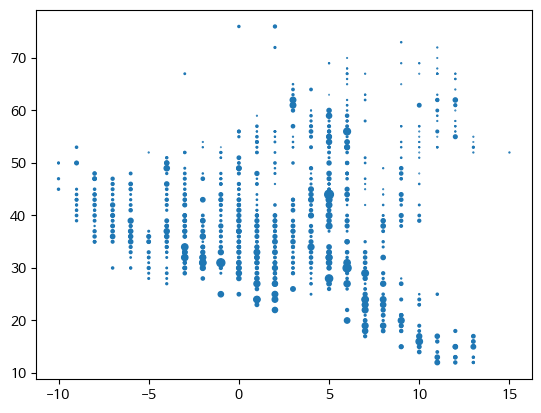

In [65]:
col_x = "기온(℃)"
col_y = "습도(%)"
col_size = "재비산먼지 평균농도(㎍/㎥)"

plt.scatter(df[col_x], df[col_y], s=df[col_size] / 20)
plt.show()

이 그래프 또한 정보를 더 표시할 수 있다.

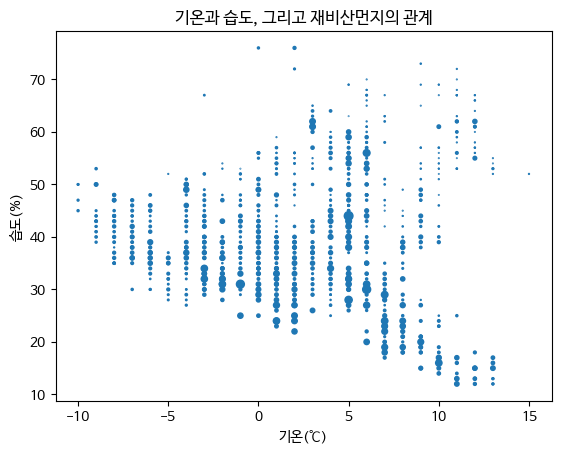

In [66]:
col_x = "기온(℃)"
col_y = "습도(%)"
col_size = "재비산먼지 평균농도(㎍/㎥)"

plt.scatter(df[col_x], df[col_y], s=df[col_size] / 20)
plt.title("기온과 습도, 그리고 재비산먼지의 관계")
plt.xlabel(col_x)
plt.ylabel(col_y)

plt.show()

연습을 더 하고 싶다면, 아래의 문제를 풀어보세요!  

**[추가문제1] 아래의 질문에 답하여라.**

1) 원 그래프를 그려라.     
* 문제1)에서 만든 데이터프레임 `df_covid`을 이용한다.
* 관악구와 관악구가 아닌 지역으로만 구분한다.
* 관악구 조각은 돌출되게 만들고, 다른 색으로 표시하여 잘 보이도록 한다.


`df_covid`의 정보를 이용하여 지역별 확진자수를 원 그래프로 그려보도록 한다.  
  
관악구 지역만 다른 색깔과 돌출된 특징을 부여하기 위하여 두개의 시리즈를 만들고, 관악구 지역만 특별히 다른 값을 부여하여 사용한다. 색깔은 `colors` 인자에, 돌출값은 `explode` 인자를 통해 전달되었다.

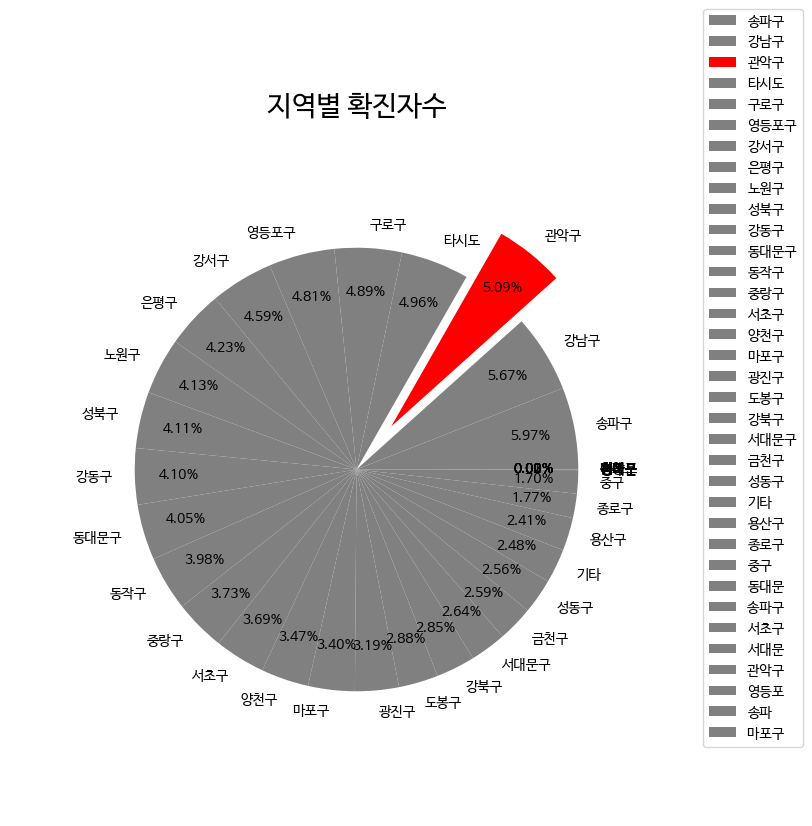

In [67]:
covid_per_area = df_covid["지역"].value_counts()

fig = plt.figure(figsize=(16, 9))

# 색깔
colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

# 돌출
explode = pd.Series(0.0, index=covid_per_area.index)
explode["관악구"] = 0.2

plt.pie(covid_per_area, labels=covid_per_area.index,
        autopct = '%.2f%%', pctdistance=0.8,
        colors=colors, explode=explode, radius=0.8)

plt.title("지역별 확진자수", fontsize=20)
plt.legend(covid_per_area.index, loc=(1, 0.1))

plt.show()

**[추가문제2] 아래의 질문에 답하여라.**

`seaborn` 모듈은 파이썬 데이터 시각화 모듈로, 그래프를 그리는 연습을 할 수 있도록 여러 데이터셋도 제공한다. `iris`에는 붓꽃 유형과 꽃잎과 꽃받침의 길이와 너비 정보가 담겨져 있다.   

1) 아래의 코드를 사용하여, 데이터프레임 `iris`를 만들어라.   
(여기서는 아래의 코드를 복사하여 붙여넣기 하면 된다.)

```
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드
```


In [68]:
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드

In [69]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2) 붓꽃 유형은 `iris`의 `species`열에 저장되어 있다. `species`열에 있는 유일한 값과 개수를 확인하여라.  

`value_counts()` 메소드를 이용하면 유일한 값과 개수를 한번에 확인할 수 있다.

In [70]:
iris["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


참고: `unique()` 메소드를 이용하면 유일한 값의 배열을 얻을 수 있다.

In [71]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

3) 꽃잎 길이(petal_length)와 꽃잎 너비(petal_width)의 산점도를 그려라.  

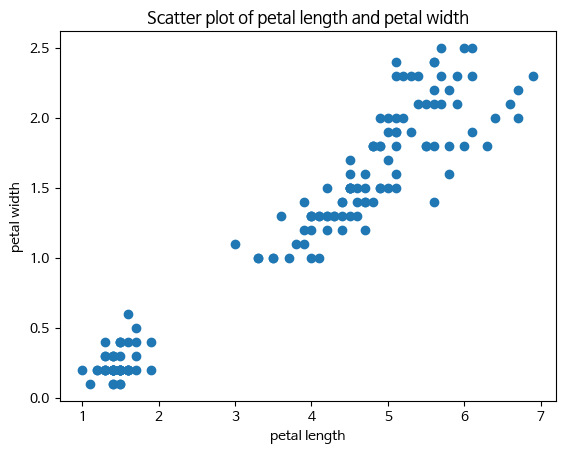

In [72]:
plt.scatter(iris["petal_length"], iris["petal_width"])

plt.title("Scatter plot of petal length and petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.show()

4) 위의 3) 산점도에서 꽃 유형(species)이 다르면, 다른 색으로 표시되도록 하여라. 이때 범례(legend)도 표시되게 한다.

서로 다른 색깔로 표시되도록 그룹으로 나누어주는 `groupby()` 메소드를 사용한 후 for문을 통해 각 경우에 대해 처리해준다. 색깔은 `colors` 리스트에 담겨 있는 순서대로 사용되며, `color` 인자를 통해 넘겨준다. 또한, 범례에 사용될 이름은 `label` 인자를 통해 넘겨준다.  
  
참고: `(name, df_group)`과 같이 따로 괄호를 통해 묶여있는 부분은 괄호 안의 변수에 대한 값이 첫번째 인자를 풀어서 받음을 의미한다.

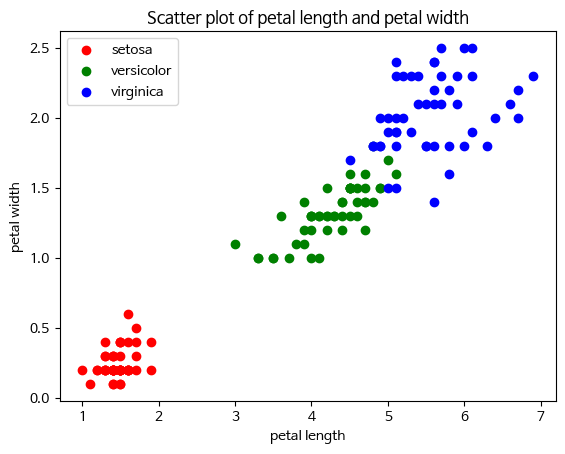

In [73]:
colors = ["red", "green", "blue"]

for (name, df_group), color in zip(iris.groupby("species"), colors):
  plt.scatter(df_group["petal_length"], df_group["petal_width"], color=color, label=name)

plt.title("Scatter plot of petal length and petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

plt.show()